<a href="https://colab.research.google.com/github/pauline-johnson/machine-learning/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 Logistical Regression

## Problem 1 

In problem 1, we generate and display random data for logical regression with two features and a class label.

In [5]:
import numpy as np
import random as ra
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.optimizers import SGD


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


This function generates random data for logistical regression with features x_1 and x_2. It returns a data array of shape (m,2) and a labels array of shape (m,1).

In [0]:
def get_random_data(w, b, mu, sigma, m):

  # Create data array and labels array (vector).
  # Data = m rows, 2 columns
  # Labels = m rows, 1 columns
  data = np.empty((m,2))
  labels = np.empty((m,1))

  for i in range (0, m): 

    # Generate class label c.
    rand = ra.random()
    c = 0 if rand <= 0.5 else 1

    # Generate feature x_1 with uniform distribution.
    x_1 = np.random.uniform(0,1)

    # Generate feature x_2 with normal distribution.
    n = np.random.default_rng().normal(mu, sigma)
    x_2 = w * x_1 + b + (-1)**c * n

    # Set matrices.
    data[i][0] = x_1
    data[i][1] = x_2
    labels[i][0] = c

  return data, labels

Using the data randomly generated above, display_random_data graphs a scatterplot of the data points, where the data corresponding to a label of 1 are red and a label of 0 are blue.

In [0]:
def display_random_data(data, labels):

  # Create colors array to display a label of 0 as blue
  # and a label of 1 as red.
  m = len(labels)
  colors = ["" for x in range(m)]
  colorlabel = ["" for x in range(m)]
  coloroptions = ['b','r']
  for i in range(m):
    label = labels.T[0][i]
    colors[i] = 'r' if label == 1 else 'b'

  # Scatter plot (0th column of data = x, 1st column = y)
  x = data[:,0]
  y = data[:,1]
  for i in range(0,m):
    colorlab = '0' if colors[i] == 'r' else '1'
    plt.plot(data[i,0], data[i,1],'o', color=colors[i])
  plt.xlabel('x1')
  plt.ylabel('x2')


Here we call the functions and split the data into a training and test set for future use. 

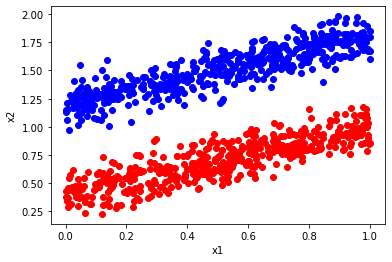

In [8]:
# Generate random data.
w = .6
b = .8
mu = .4
sigma = .1
m = 1000

data,labels = get_random_data(w, b, mu, sigma, m)

# Display random data.
display_random_data(data,labels)

# Split data and labels into training and test sets (~80% training and 
# 20% testing data).
training_size = (int)(0.8 * m)

training_data = data[:training_size]
test_data = data[training_size:]

training_labels = labels[:training_size]
test_labels = labels[training_size:]

training_data = np.asarray(training_data).astype(np.float32)


# Problem 2

Using the randomly generated data from above, create a Keras to implement logical regression.
 

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.optimizers import SGD


The Sequential model is a linear stack of layers.
 We will add a Dense layer that accepts two-dimensional input
 with two rows and output with one row.


In [0]:
model = Sequential()
model.add(Dense(1, input_shape=(2,)))


Now we configure the learning process.
There are two required parameters, a loss function and an optimizer. 

Loss functions evaluate how well the model models your dataset.
We use the default binary cross-entropy.

Optimizers tie together loss function and model parameters by updating the model in response to loss function's output. We use stochastic gradient descent which uses random batches for this process.

We train model for 1000 epochs, or iterations on a dataset. As you can see the loss goes down every epoch.


In [11]:
model.compile(loss='binary_crossentropy', optimizer='sgd')
model.fit(training_data, training_labels, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
100/100 [==============================] - 0s 968us/step - loss: 0.7312
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 0.3367
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 0.2066
Epoch 4/100
100/100 [==============================] - 0s 981us/step - loss: 0.1290
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0849
Epoch 6/100
100/100 [==============================] - 0s 976us/step - loss: 0.0610
Epoch 7/100
100/100 [==============================] - 0s 904us/step - loss: 0.0474
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0383
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0325
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0286
Epoch 11/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 12/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch

## Scatterplot
Here is a scatterplot of the data. The green line is the true line used to generate the data. The yellow line is the separating line of the trained model. This line is found by converting `w1 * x1 + w2 * x2 + b = 0` to `x_2 = -(w1 * x1 + b) / w2`.

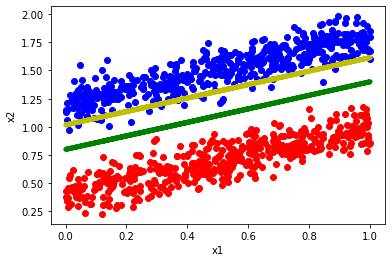

In [102]:
display_random_data(data, labels)
x_1 = data[:,0]

# Line used to generate data.
plt.plot(x_1, w * x_1 + b, color='g', linewidth=5)
weights, bias = model.layers[0].get_weights()

# Separating line of trained model.
x_2 = -1*((weights[0]*x_1)+bias)/weights[1]
plt.plot(x_1, x_2, color='y', linewidth=5)

##Heatmap

(2, 1) (1,) (1000, 2)
(50, 50) (50, 50)


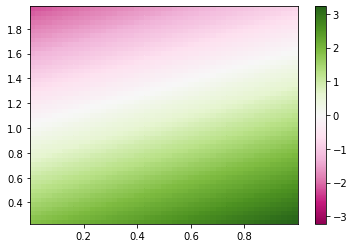

In [103]:
def heatmap(w, b, data):

  y, x = np.meshgrid(np.linspace(df['x_2'].min(), df['x_2'].max()), np.linspace(df['x_1'].min(), df['x_1'].max()))
  print(y.shape, x.shape)
  z = b+y*w[1]+x*w[0]
  z = z[:-1, :-1]
  maxz, minz = np.abs(z).max(), -1*np.abs(z).max()

  hm, axis = plt.subplots()
  c = axis.pcolormesh(x, y, z, vmin=minz, vmax=maxz, cmap='PiYG')
  axis.axis([x.min(), x.max(), y.min(), y.max()])
  hm.colorbar(c, ax=axis)

d = data.transpose()
d1 = d[0][:]
d4 = d1.transpose() 
x1 = pd.DataFrame(d4)

d2 = d[1][:]
d3 = d2.transpose() 
x2 = pd.DataFrame(d3)

l = labels.transpose()
l1 = l[0][:]
c = pd.DataFrame(l1.transpose())

df = pd.concat([x1, x2, c], axis=1, ignore_index=True)
df.columns = ['x_1','x_2','c']

print(weights.shape, bias.shape, data.shape)
heatmap(weights, bias, data)

# Problem 3

Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.



In [0]:
def loss(weights, x_1, x_2):
  z = np.dot(x_1,weights)
  sigmoid = 1/(1+np.exp(-z))
  cur_loss = (-1*x_2*np.log(sigmoid)) - ((1-x_2)*np.log(1-sigmoid))
  total_loss = 1/len(x_2)*sum(cur_loss)
  gradient = 1/len(x_2)*np.dot(x_1.transpose(), (-1*x_2 + sigmoid))
  return total_loss[0], gradient

def sgd(x_1,x_2,w,lr,iterations):    
  for i in range(iterations):
      cost, grad = loss(w,x_1,x_2)
      w = w-(lr*grad)
  return theta

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X = np.append(np.ones((X.shape[0],1)), X, axis=1)
initial_theta = np.zeros((X.shape[1], 1))
theta = sgd(X,y,initial_theta,1,1000)
bias, weights = theta[0], theta[1:]


## Generate Graph

Here is a scatterplot of the data. The green line is the true line used to generate the data. The yellow line is the separating line of the trained model.

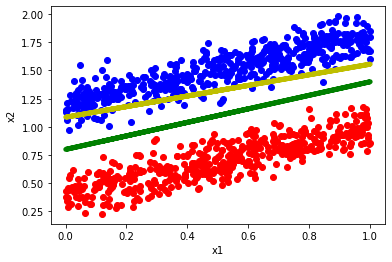

In [139]:
display_random_data(data, labels)
x_1 = data[:,0]
x_2 = 1*((weights[0]*x_1)+bias)/weights[1]

plt.plot(x_1, x_2, color='y', linewidth=5)

# Line used to generate data.
plt.plot(x_1, w * x_1 + b, color='g', linewidth=5)

# Sources

https://keras.io/getting-started/sequential-model-guide/
https://algorithmia.com/blog/introduction-to-optimizers

https://keras.io/models/about-keras-models/
https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-logistic-regression-c0ae25509feb